     ┌───┐             
q_0: ┤ X ├──■──────────
     ├───┤┌─┴─┐        
q_1: ┤ X ├┤ X ├──■─────
     └───┘└───┘┌─┴─┐┌─┐
q_2: ──────────┤ X ├┤M├
               └───┘└╥┘
c: 1/════════════════╩═
                     0 

Measurement results: {'0': 1024}


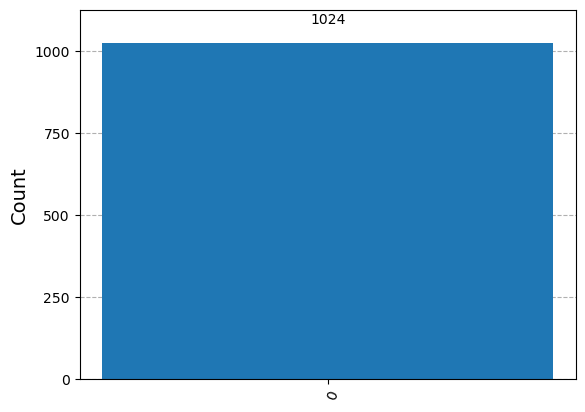

In [12]:
# Create a Quantum Circuit with 3 qubits and 1 classical bit
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit with 3 qubits and 1 classical bit
qc = QuantumCircuit(3, 1)

# Initialize the qubits (example: q1 = |1>, q2 = |1>)
qc.x(0)  # Apply X gate to set q1 = |1>
qc.x(1)  # Apply X gate to set q2 = |1>

# Add the comparison circuit
qc.cx(0, 1)  # CNOT: q1 (control), q2 (target)
qc.cx(1, 2)  # CNOT: q2 (control), ancilla (target)

# Measure the ancilla qubit
qc.measure(2, 0)

# Visualize the circuit
print(qc.draw())

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator',shots=512) #shots default = 1024
job = transpile(qc,simulator)  
result = simulator.run(job).result() 
#result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts()

# Display the result
print("\nMeasurement results:", counts)
plot_histogram(counts)
